# KNN 算法

## KNN 分类

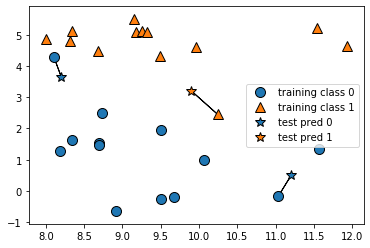

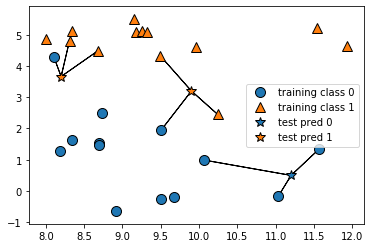

In [4]:
import mglearn
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

### 使用 KNN 分类 forge 数据集

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# 构造 二分类forge数据集
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print('shape of X_train:', X_train.shape)
print('shape of X_test:', X_test.shape)
print('shape of y_train:', y_train.shape)
print('shape of y_test:', y_test.shape)

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

shape of X_train: (19, 2)
shape of X_test: (7, 2)
shape of y_train: (19,)
shape of y_test: (7,)
1.0


### 查看分类决策 边界

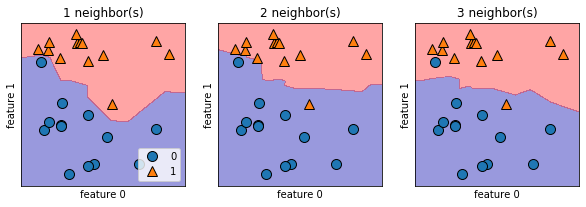

In [6]:
ig, axis = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1,2,3], axis):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axis[0].legend(loc=4)
plt.show()

### 在新数据集上验证模型效果与 近邻数量的关系

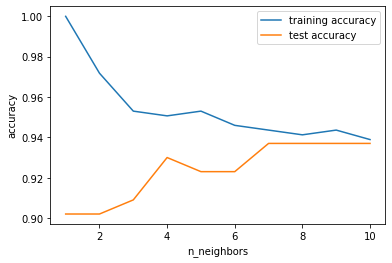

In [7]:
from sklearn.datasets import load_breast_cancer

canser_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(canser_data.data, canser_data.target, random_state=2)

neibors_setting = range(1,11)
train_acc = []
test_acc = []

for n_neighbors in neibors_setting:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))
    
plt.plot(neibors_setting, train_acc, label='training accuracy')
plt.plot(neibors_setting, test_acc, label='test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## KNN 回归

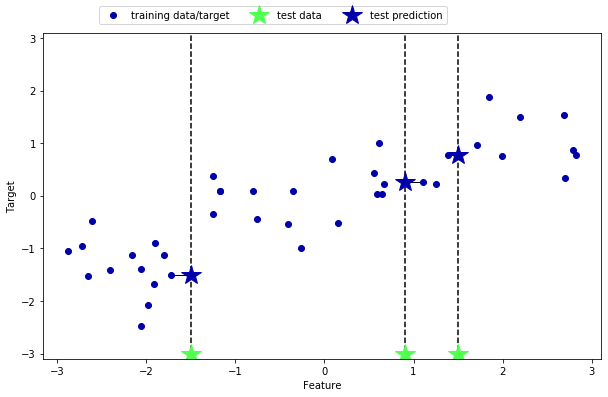

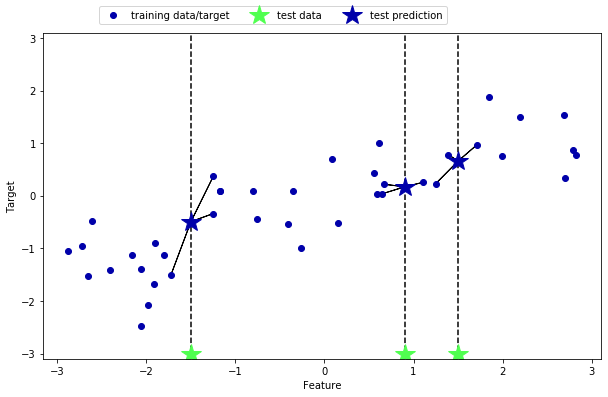

In [8]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.show()
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()

### 使用KNN 回归 wave 数据集

In [9]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

y_pred = reg.predict(X_test)
print('y_test:', y_test)
print('y_pred:', y_pred)

print('predict R^2 score:', reg.score(X_test, y_test))

y_test: [ 0.43655826  0.09398858 -1.38773632 -0.90496988 -1.13455014  0.21778193
 -2.08581717  1.49417157  0.08448544  0.7789638 ]
y_pred: [ 0.35686046 -0.65851598 -1.75656248 -1.88623129 -1.88623129  0.35686046
 -1.75656248  1.19926374  0.04220323  0.91241374]
predict R^2 score: 0.7732425944575221


### 查看回归曲线

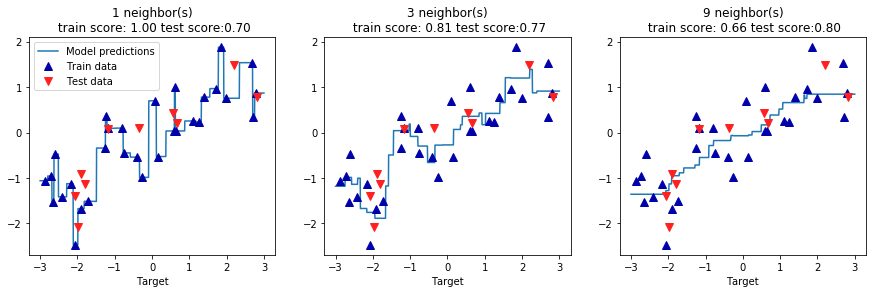

In [10]:
import mglearn
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15,4))

# 创建数据点
line = np.linspace(-3, 3, 1000).reshape(1000, 1)

for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title('{} neighbor(s)\n train score: {:.2f} test score:{:.2f}'.format(n_neighbors,
                                                                                reg.score(X_train, y_train),
                                                                                reg.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_xlabel('Target')
    
axes[0].legend(['Model predictions', 'Train data', 'Test data'])
plt.show()